In [ ]:
A
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

## Data understanding

In [ ]:
#Load the dataset
df=pd.read_csv("/content/CHIRPS_5_Countries_2018_2022.csv",encoding='latin1')

#make a copy of the dataset
df1=df.copy()



In [ ]:
#check the number of rows and columns
df1.shape

(900, 5)

In [ ]:
#check the info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      900 non-null    object 
 1   Region       900 non-null    object 
 2   Year         900 non-null    int64  
 3   Month        900 non-null    int64  
 4   Rainfall_mm  900 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 35.3+ KB


In [ ]:
#checkk the first 5 rows of the dataset
df1.head(5)

,Country,Region,Year,Month,Rainfall_mm
0,Kenya,Nairobi,2018,1,25.41
1,Kenya,Nairobi,2018,2,214.89
2,Kenya,Nairobi,2018,3,218.55
3,Kenya,Nairobi,2018,4,256.78
4,Kenya,Nairobi,2018,5,291.81


In [ ]:
#Check the last 5 rows
df1.tail(5)

,Country,Region,Year,Month,Rainfall_mm
895,Côte dIvoire,Korhogo,2022,8,349.26
896,Côte dIvoire,Korhogo,2022,9,389.53
897,Côte dIvoire,Korhogo,2022,10,387.71
898,Côte dIvoire,Korhogo,2022,11,301.11
899,Côte dIvoire,Korhogo,2022,12,56.38


In [ ]:
#Check unique values
df1.nunique()

,0
Country,5
Region,15
Year,5
Month,12
Rainfall_mm,896


In [ ]:
#statistical summary of the dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,900.0,2020.000000,1.415000,2018.00,2019.000,2020.00,2021.0000,2022.00
Month,900.0,6.500000,3.453972,1.00,3.750,6.50,9.2500,12.00
Rainfall_mm,900.0,202.686533,116.450002,6.83,98.985,205.14,303.5475,399.89


## Data Cleaning

In [ ]:
# checking for duplicates
df1.duplicated().sum()

np.int64(0)

In [ ]:
#Checking for missing values
df1.isnull().sum()

,0
Country,0
Region,0
Year,0
Month,0
Rainfall_mm,0


In [ ]:
#Creating numerical column
num_cols=df1.select_dtypes(include=['int64','float64']).columns
num_cols


Index(['Year', 'Month', 'Rainfall_mm'], dtype='object')

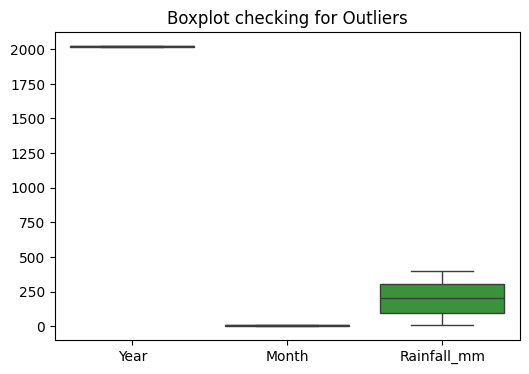

In [ ]:
9#Check for outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df1[num_cols])
plt.title("Boxplot checking for Outliers")
plt.show()



## Data preprocessing

In [ ]:
#Normalize numerical columns
scaler=MinMaxScaler()
df1[num_cols]=scaler.fit_transform(df1[num_cols])
df1.head()



,Country,Region,Year,Month,Rainfall_mm
0,Kenya,Nairobi,0.0,0.000000,0.047270
1,Kenya,Nairobi,0.0,0.090909,0.529334
2,Kenya,Nairobi,0.0,0.181818,0.538645
3,Kenya,Nairobi,0.0,0.272727,0.635908
4,Kenya,Nairobi,0.0,0.363636,0.725029


In [ ]:
#create a categorical column
cat_cols=[['Region']]
cat_cols

[['Region']]

In [ ]:
#Normalize categorical columns
encoder=LabelEncoder()/
for col in cat_cols[0]: #iterate through the inner list
  df1[col]=encoder.fit_transform(df1[col])
  df1.head()


## Visual rainfall trends by country

In [ ]:
#select the 3 features
features=df1[['Country','Year','Rainfall_mm']]

In [ ]:
infall Over Years

[Text(0.0, 0, '0'),
 Text(0.25, 0, '0'),
 Text(0.5, 0, '0'),
 Text(0.75, 0, '0'),
 Text(1.0, 0, '1')]

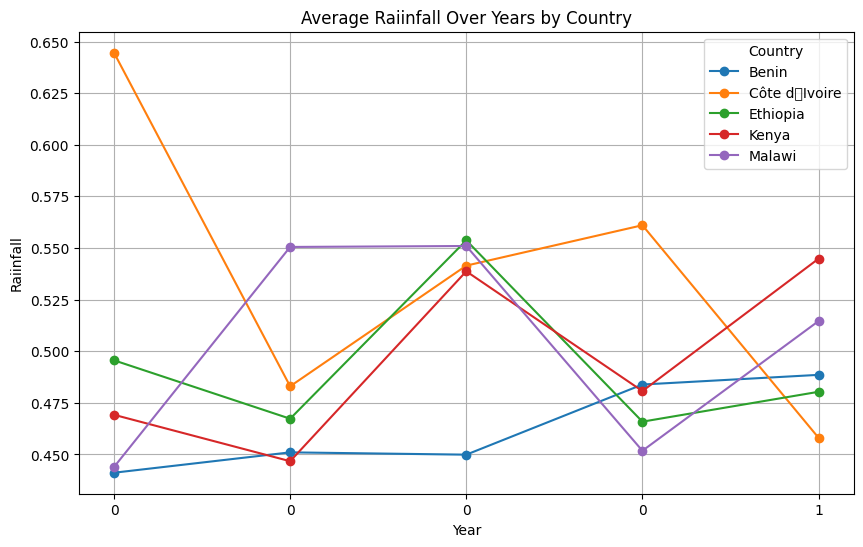

In [ ]:
#Group by Country and Year and get aaverage rainfall(example)
features=df1.groupby(['Country','Year'])['Rainfall_mm'].mean().unstack('Country')
#Plot
axis=features.plot(kind='line',marker='o',figsize=(10,6))
axis.set_title('Average Raiinfall Over Years by Country')
axis.set_xlabel('Year')
axis.set_ylabel('Raiinfall')
axis.grid(True)
#set correct tick positions
axis.set_xticks(features.index)
#Convert years to integers
axis.set_xticklabels(features.index.astype(int))
